# 09 Project 2 - SkimLit

Previously we covered a few key topics 

1. Tokenization: Turning words (or letters/sentences) into numbers
2. Embeddings: Creating numerical, multi-dimensional representation of words

This project will put these above topics into practice. 

We are going to replicate the model behind the 2017 paper [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

The paper presented an at the time new dataset called PubMet 200k TCT which contained ~200k labeled Randomized Controlled Trial paper abstracts. The goal of the paper was to attempt to classify sentences which appear in sequential order. i.e. given the abstract of a RCT, what role does each sentence play within the abstract?

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

**Problem in a sentence**
> The number of RCT papers released is continuing to increase, those without structured abstracts can be hard to read and in turn slow down researchers moving through the literature. 

**Solution in a sentence**
> Create an NLP model to classify abstract sentences into the role they play (e.g. objective, methods, results, etc)  to enable researchers to skim through the literature (hence SkimLit 🤓🔥) and dive deeper when necessary.

*Note:* This notebook was created following the'code-along' TensorFlow Deep Learning by mrdbourke.

## Example Model Input and Output

### Model Input

For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model output

And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

## Notebook Content

Time to take what we've learned in the NLP fundmentals notebook and build our biggest NLP model yet:

* Downloading a text dataset ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Writing a preprocessing function to prepare our data for modelling
* Setting up a series of modelling experiments
  * Making a baseline (TF-IDF classifier)
  * Deep models with different combinations of: token embeddings, character embeddings, pretrained embeddings, positional embeddings
* Building our first multimodal model (taking multiple types of data inputs)
  * Replicating the model architecture from https://arxiv.org/pdf/1612.05251.pdf 
* Find the most wrong predictions
* Making predictions on PubMed abstracts from the wild


## Confirm Access to GPU

Runs much faster...

In [2]:
# Check for GPU connection
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-109dae3e-c1de-a8d1-5ee0-f92f375fd977)


## Get data

The authors of the original paper made the data of their research freely available on github in txt format. We can easily copy it from their github repository using `git-clone`.

`git clone https://github.com/Franck-Dernoncourt/pubmed-rct`.


In [3]:
# Clone the research paper's data
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


By viewing the contents of the directory we can see that there are four folders, each containing a different version of the dataset.

* 2 folders are of the original data
 * One folder is full sized (200k)
 * One folder is 10% (20k)
* 2 folders have all numbers replaced with the @ symbol

This project will start using the 20k dataset because it is smaller and will allow quicker iterations before trying the final model on the full dataset.

In [4]:
# Check files within the 20k dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


We can see that we have 3 files, 
* train.txt are the training samples
* dev.txt are the development set, also known as the validation set
* text.txt are the testing samples

To save time and simplify our code we will turn each path into a variable

In [5]:
# set directory to 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

# Check all filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Preprocessing the data

Let's visualize what we are working with to get things started...

In [6]:
# Define a function to read lines from our input documents
def get_lines(filename):
  """
  Reads filename (txt file) and returns the lines of text as a list.

  Args:
    filename: a string containing the target filepath to read

  Returns: 
    A lsit of strings with one string per line from the target filename.
    e.g.:
      ["This is the first line of filename",
      "this is the second line of filename",
      "etc..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [7]:
# Try our above function on train.txt
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # 20 lines returns one whole abstract with some more of the second one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Breakdown of the above output:

The role of each sentence is prefixed at the start of each line separated by a tab (`\t`) and each sentence finishes with a new line (\n).

Different abstracts are separated by abstract ID's (lines beginning with `###`) and newlines (`\n`).

With these insights we can see that we need to take a few steps to properly prepare our data to be processed.

We will create a new function to do this. It will:
 * Receive a target file of abstract samples
 * Read the lines of the received file
 * For each line in the file:
  * If the line begins with `###` mark it as an abstract ID and the beginning of a new abstract
    * Keep track of (count) the number of lines in the sample
  * If the line begins with `\n` mark is as the end of the abstract sample
  * Record text before the `\t` as the label of the line
  * Record the text asfter the `\t` as the text of the line
* Return all the lines of the target file as a list of dictionaries containing the following key/value pairs:
 * `"line_number"` - the position of the line in the abstract (e.g. `3`)
 * `"target"` - the role of the line in the abstract (e.g. `OBJECTIVE`)
 * `"text"` - the text of the line in the abstract.
 * `"total_lines"` the total lines in an abstract sample (e.g. `14`)
* Abstract IDs and newlines will be omitted from the returned preprocessed data as they are not relevant to the analysis (*though I would think that the abstract ID could be helpful in troubleshooting misclassified samples later?*)

Below we see an example of what a single line from the abstract should look like after being preprocessed
```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [8]:
# Create the preprocessing function
def preprocess_text_with_line_numbers(filename):
  """
  Returns a list of dictionaries of abstract line data.

  Takes in a filename, reads its contents and sorts through each line, extracting the target label, the text, total number of sentences and current sentence number

  Args:
    filename: a string of the target text file to read and extract line data from.
  
  Returns:
    A list of dictionaries each cotnaining a line from an abstract, the lines label, the lines position in the abstract, and the total number of lines in the abstract.

    example:
          [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """

  input_lines = get_lines(filename) # get all the lines from the the filename
  abstract_lines = "" # intiialize empty
  abstract_samples = [] # initialize empty list

  # Loop through each line
  for line in input_lines:
    if line.startswith("###"): 
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      
      # Iterate through each line and count them
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]  # get target text label
        line_data["text"] = target_text_split[1].lower() # get target text and set to lowercase
        line_data["line_number"] = abstract_line_number # what number line does this line appear in the abstract
        line_data["total_lines"] = len(abstract_line_split) - 1 # total lines in the abstract

        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if neither above condition is fulfilled then the line contains a labelled sentence
      abstract_lines += line
      
  return abstract_samples


In [9]:
# Get the data from file and preprocess
%%time

train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

len(train_samples), len(val_samples), len(test_samples)

CPU times: user 700 ms, sys: 126 ms, total: 826 ms
Wall time: 1.02 s


In [10]:
# View our first abstract of train_samples
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [11]:
# Concert list of dictionaries to pandas DataFrame to assist with visualization
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [12]:
# What does the breakdown of our target labels look like?
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

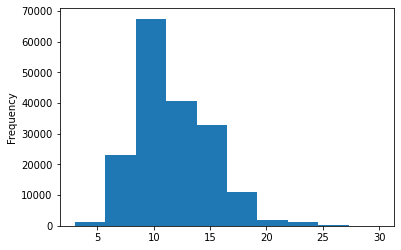

In [13]:
# Distribution of length of abstracts
train_df.total_lines.plot.hist()

It's important to understand this high-level information from our data so that we know what output is reasonable. Distributions also matter as heavily skewed data needs to be handled differently.

### Get lists of sentences

One of the main inputs to our model will be a list of strings (the lines of the abstract).

We will obtain this list from our DataFrames using `tolist()` on the `"text"` columns.

In [14]:
# Convert text lines to a list
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)


(180040, 30212, 30135)

In [15]:
# View 10 lines
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

From here we still need to convert our text into numbers

### Make numberic labels 

For this project we will create one hot and label encoded labels

TensorFlow's CategoricalCrossentropy loss function likes one-hot encoded labels, and this will enable usto use label smoothing later. 

We will call the classes `OneHotEncoder` and `LabelEncoder`

In [16]:
## One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
train_labels_one_hot.shape

(180040, 5)

In [18]:
### Label Encode Labels

In [19]:
# extract labels and encode them to integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [20]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Creating a series of model experiments

Now that our data is set up in a way that can be fed into a model, we need to set up a series of modelling experiments to perform the classification.

As with previous modeules we will start with a simple baseline model and then work to improve with more complex models. We will iterate towards the model outlined in [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

Each model will be trained on the training data and validated on the validation data (sourced from the dev.txt data set)


## Model 0: Baseline model

Our first model we'll be a TF-IDF Multinomial Naive Bayes as recommended by [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

To build it, we'll create a Scikit-Learn `Pipeline` which uses the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class to convert our abstract sentences to numbers using the TF-IDF (term frequency-inverse document frequecy) algorithm and then learns to classify our sentences using the [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) aglorithm.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create pipeline
model_0 = Pipeline([
                    ("tf-idf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

*Note:* One nice thing about Naive Bayes classification algorithms is how fast they are as run time complexity is O(d*c) (where d is the query vector’s dimension, and c is the total classes). Space complexity is also O(d*c) since we are storing only the likelihood of each feature with respect to classes 

In [22]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

Baseline model starting out with 72% accuracy!

In [23]:
# Make predictions 
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

We will leverage the `calculate_results()` function created in notebook 08 by importing it from our [`helper_functions.py` script](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py) script

**refresher**: `calculate_results()` will return

* Accuracy
* Precision
* Recall
* F1-score

## Download helper functions

In [24]:
# Download helper function from github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-29 00:45:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-29 00:45:21 (68.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [25]:
# Import calculate_results function
from helper_functions import calculate_results

In [26]:
# Call calculate_results on model_0
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Preparing data for deep sequence models

Before creating more models we need to create vectorization and embedding layers. 

* Vectorication layer will convert our text to numbers.
* Embedding layer will capture relationsihps between those numbers.

We will create these layers using TensorFlow and Numpy.

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

When turning sentences into numbers it is important to understand how many words are in each sentence. This is important because when a model iterates through the sentences the best outcome is obtained when the sentences are all the same length. This plays into created batches of equal length tensors.

For example, if one sentence is 10 words long and another is 30 words long we would want to pad the shorter sentence with 0s to make it a length of 30. 

In [28]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # average token length of sentences from trainind data

26.338269273494777

(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <a list of 7 Patch objects>)

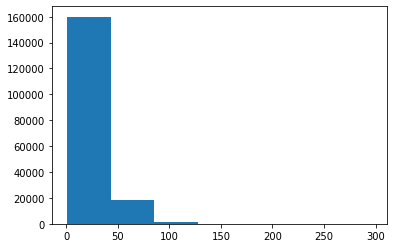

In [29]:
# Distribution of sentence length to help find cut-off we want
import matplotlib.pyplot as plt

plt.hist(sent_lens, bins=7)

We can see that the large majority of sentences is between 0 and 50 tokens.

It would be good to be able to cut off at 95% of our sentence length to remove the tail of the distribution. Let's use NumPy's `percentile`.

In [30]:
# Find sentence length that covers 95% of all lengths
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

## Create text vectorizer

Using the `TextVectorization` layer from TensorFlow we will turn our text to numbers. We will manually set the `max_tokens` (number of unique words) parameter and `output_sequence` (desired output length of sentences).  

In [31]:
# Check the number of unique words in dictionary
max_tokens = 68000 # as stated in the original paper (https://arxiv.org/pdf/1710.06071.pdf)

In [32]:
# Create text vectorizer
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of tokens in vocab
                                   output_sequence_length=55) # desired output length of vectorized sequences

Now that the text vectorizer is created, we need to adapt it to our training data i.e. set numbers to represent words.

In [33]:
# Adapt the text vectorizer to the trainind data
text_vectorizer.adapt(train_sentences)

In [34]:
# Let's test it!
import random

target_sentence = random.choice(train_sentences)
print(f"text:\n{target_sentence}")
print(f"\nLength of text:{len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}") 

text:
this may contribute to interpatient differences in their responses to antidepressant drugs .

Length of text:13

Vectorized text:
[[   23    91  1456     6 22808   102     5   120   442     6  2215   625
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


Let's get some more helpful information about our corpus using `get_vocabulary()`.

In [35]:
# Info about our training vocab
rct_2k_text_vocab = text_vectorizer.get_vocabulary()

In [36]:
print(f"Number of words in vocab: {len(rct_2k_text_vocab)}"),
print(f"Most common words in vocab: {rct_2k_text_vocab[:10]}")
print(f"Least common words in the vocab: {rct_2k_text_vocab[-10:]}")

Number of words in vocab: 64841
Most common words in vocab: ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
Least common words in the vocab: ['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [37]:
# Return the config of the text_vectorizer
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

## Create Custom Embedding

The current `token_vectorization` layer maps the words in our text to numbers, but doesn't capture the relationships between those numbers. To get this richer (relationship-based) numberical representation of our text we will use an **embedding** layer. 

As our model learns by iterating through our different examples of abstract sentences and their labels, it will update the embedding to better represent the relationships between tokens in our corpus.

We will built the `Embedding Layer` using TensorFlow's API.

We need to be concerned about our `input_dim` parameter (size of vocab) and the `output_dim` parameter (embedding output). the `Embedding_Layer` will take the integer outputs of our `text_vectorization` layer as inputs and convert them to feature vectors of size `output_dim`. 

In [38]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_2k_text_vocab), # length of vocab
                               output_dim=128,  # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # We will use masking to handle variable sequence lengths (saves space)
                               mask_zero=True,
                               name="token_embedding")

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
this may contribute to interpatient differences in their responses to antidepressant drugs .

Sentence after vectorization (before embedding):
[[   23    91  1456     6 22808   102     5   120   442     6  2215   625
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.00104151  0.02848252 -0.04735696 ...  0.03394369 -0.02286477
   -0.02723252]
  [-0.03863722  0.03110595 -0.00050918 ... -0.02377939  0.01873619
   -0.03156801]
  [-0.01406527 -0.00342866  0.00015515 ...  0.0274618   0.03015271
   -0.00079299]
  ...
  [-0.01295834  0.00060626  0.01185033 ...  0.02574021 -0.03349873
   -0.04207734]
  [-0.01295834  0.00060626  0.01185033 ...  0.02574021 -0.03349873
   -0.04207734]
  [-0.01295834  0.00060626  0.011850

## Create Datasets **QUICKLY!**

Above we have preprocessed our datasets to be used, hwoever we can help make them work faster with our models.

the `tf.data` API provides methods which enabel faster data loading.

Mainly, we want to turn our data into a `PrefetchDataset` of batches.

By doing this we will ensure that TensorFlow will load our data onto the GPU as fast as possible - which translates into faster training time. 

We will use `batch()` and `prefetch() and the parameter `tf.data.AUTOTUNE` to create a `PrefetchDataset`. The `AUTOTUNE` will allow TensorFlow to determin the optimmal amoutn of compute to use to prep the datasets.

In [39]:
# Convert our data into tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset


<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [40]:
# Convert TF datasets to prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model_1: Conv1D with token embeddings

We are all set to build our models now.

> Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probs)

Most of the models will now just adjust the `layers` component. 

As always, we will follow the standard workflow of 
* Build
* Train
* Evaluate

In [41]:
# Create 1D Convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of the feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [42]:
# Compile the model_1
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not 1-hot) use sparse_Categorical_crossentropy)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [43]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

Since our training data contains nearly 200,000 sentences, fitting a deep model may take a while even with a GPU. So to keep our experiments swift, we're going to run them on a subset of the training dataset.

More specifically, we'll only use the first 10% of batches (about 18,000 samples) of the training set to train on and the first 10% of batches from the validation set to validate on.

In [44]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 20s 12ms/step - loss: 0.9269 - accuracy: 0.6330 - val_loss: 0.6890 - val_accuracy: 0.7364
Epoch 2/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6571 - accuracy: 0.7570 - val_loss: 0.6293 - val_accuracy: 0.7713
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6143 - accuracy: 0.7767 - val_loss: 0.5935 - val_accuracy: 0.7856


In [45]:
# Evaluate model_1
model_1.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5948 - accuracy: 0.7877


[0.5947564244270325, 0.7877002358436584]

In [46]:
# Make predictions with our model
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

array([[4.6436414e-01, 1.3573024e-01, 8.4493428e-02, 2.9123658e-01,
        2.4175668e-02],
       [4.2652223e-01, 2.8472450e-01, 1.6948538e-02, 2.6341978e-01,
        8.3848666e-03],
       [1.4630720e-01, 1.1082840e-02, 1.3415993e-03, 8.4124339e-01,
        2.5016529e-05],
       ...,
       [6.3374600e-06, 4.6713665e-04, 4.8299402e-04, 2.5893949e-06,
        9.9904090e-01],
       [6.7851141e-02, 4.3686816e-01, 1.1010694e-01, 8.0886990e-02,
        3.0428669e-01],
       [1.6255429e-01, 7.0746279e-01, 2.8167367e-02, 4.4497799e-02,
        5.7317737e-02]], dtype=float32)

In [47]:
# Convert probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [48]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.77002515556732,
 'f1': 0.7853469072146462,
 'precision': 0.7842210882773143,
 'recall': 0.7877002515556732}

## Model_2: Feature extraction using pretrained token embeddings

Since we are replicating the model architecture from [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), they used a [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) as a way to initialise their token embeddings.

To emulate this, let's see what results we can get with the [pretrained Universal Sentence Encoder embeddings from TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4).

*Note:* we are going to use pretrained embeddings which are readily available in TensorFlow 

**This model will not have a Tokenization layer**

The model will look like 
```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```

This is because the *Universtal Sentence Encoder* (USE) takes care of the tokenization

Reminder: This types of model utilized *transfer learning*, specifically *feature extraction transfer learning*

As before we will use `hub.KerasLayer` to doqnload the pretrained USE layer.

We will keep the pretrained embedded layers frozen, and add a few more trainable layers of our own to adapt the pretrained layers to our use.

In [49]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

Our USE layer is now downloaded and instantiated as a `hub.KerasLayer` instance. Let's check it out!

In [50]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Randomly chosen training sentence:\n{random_training_sentence}\n")
print(f"Length of chosen training sentence:\n{len(random_training_sentence)}")

use_embedding_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedding_sentence[0][:30]} (truncated)")
print(f"Length of embedding:\n{len(use_embedding_sentence[0])}")

Randomly chosen training sentence:
one hundred and fifteen patients with atrial fibrillation ( af ) were evaluated during @-month follow-up after surgery .

Length of chosen training sentence:
120
Sentence after embedding:
[-0.07319493  0.06215598 -0.00459107 -0.04274268 -0.07233384  0.00402281
  0.04322937  0.00469067 -0.01401284  0.02603224  0.09133948 -0.051136
  0.06373321  0.05404501  0.05401646  0.03639575 -0.09219188  0.04823337
 -0.00591297  0.08468717 -0.04935832  0.06988938  0.01880063  0.03021078
 -0.05074249 -0.01118085 -0.04100424  0.03569108  0.00551051 -0.02009959] (truncated)
Length of embedding:
512


We can see that the embedding feature included in the USE module is 512 dimensions (vs the 128 we used).

### Building and fitting the NLP feature extraction model (Universal Sentence Encoder)

In [51]:
# Define feature extraction model using TF Hub Layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add fully connected layer on top of embedding
# Can add more layers here later...
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [52]:
# GEt a summary of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


Lots of parameters, but not trainable so should still be quite fast to fit.

In [53]:
# Fit the feature extractor model for 3 epochs
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 18s 25ms/step - loss: 0.9180 - accuracy: 0.6519 - val_loss: 0.7957 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 13s 24ms/step - loss: 0.7670 - accuracy: 0.7021 - val_loss: 0.7528 - val_accuracy: 0.7078
Epoch 3/3
562/562 [==============================] - 13s 23ms/step - loss: 0.7500 - accuracy: 0.7139 - val_loss: 0.7367 - val_accuracy: 0.7131


In [54]:
# Evalute the whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.7386 - accuracy: 0.7153


[0.7385587096214294, 0.7153449058532715]

In [55]:
# Make predictions
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[0.455477  , 0.32442543, 0.0024196 , 0.20967619, 0.00800178],
       [0.359329  , 0.45666948, 0.00296236, 0.17864808, 0.00239104],
       [0.23987399, 0.13059533, 0.02200889, 0.57060677, 0.03691509],
       ...,
       [0.00168   , 0.00741965, 0.07161806, 0.00094848, 0.91833377],
       [0.00411318, 0.04615743, 0.2071868 , 0.00165129, 0.7408913 ],
       [0.20711005, 0.28395343, 0.44853893, 0.00483841, 0.05555917]],
      dtype=float32)

In [56]:
# Convert probs to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [57]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.53448960677876,
 'f1': 0.7124236886042022,
 'precision': 0.7154136012366189,
 'recall': 0.7153448960677876}

## Model 3: Conv1D with character embeddings 

### Created a character-level tokenizer

So far we have been creating tokens per word. 

[*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) paper mentions their model uses a hybrid of token and character embeddings.

The difference between a character and token embedding is that the **character embedding** is created using sequences split into characters (e.g. `hello` -> [`h`, `e`, `l`, `l`, `o`]) where as a **token embedding** is created on sequences split into tokens.

![example of difference between token level and character level embeddings](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-token-vs-character-embeddings.png)
*Token level embeddings split sequences into tokens (words) and embeddings each of them, character embeddings split sequences into characters and creates a feature vector for each.*

We can create a character-level embedding by first vectorizing our sequences (after they've been split into characters) using the [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) class and then passing those vectorized sequences through an [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.

Before we can vectorize our sequences on a character-level we'll need to split them into characters. Let's write a function to do so.

In [58]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test split chars function
split_chars(random_training_sentence)

'o n e   h u n d r e d   a n d   f i f t e e n   p a t i e n t s   w i t h   a t r i a l   f i b r i l l a t i o n   (   a f   )   w e r e   e v a l u a t e d   d u r i n g   @ - m o n t h   f o l l o w - u p   a f t e r   s u r g e r y   .'

In [59]:
# Split sentence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]


In [60]:
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [61]:
# Average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <a list of 7 Patch objects>)

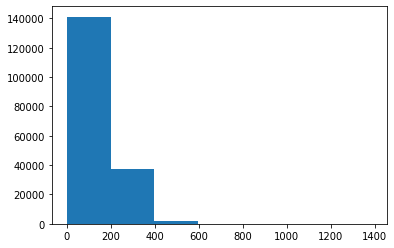

In [62]:
# Check the distribution of char level 
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7)

In [63]:
# Itentify 95% cutoff of length
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

It is helpful in real applications to experiment with an *optimal* `output_sequence_length`

We will set the `max_tokens` to 28. This covers the 26 letters in the alphabet, a space token, and and OOV (out of vocab) tokens. For this it would be '@' which replaces all numerical characters. 

In [64]:
# Get all keyboard characters for character level embedding
import string 
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# ADapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

Let's revisit how we explored our data when it was token-level, but for our char-level data.

In [66]:
# Investigate character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different chars in corpus: {len(char_vocab)}")
print(f"5 most common charaters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different chars in corpus: 28
5 most common charaters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [67]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h e r e   w a s   n o   d i f f e r e n c e   i n   t h e   p e g l o t i c a s e   s a f e t y   p r o f i l e   b a s e d   o n   c k d   s t a g e   .

Length of chars: 65

Vectorized chars:
[[ 3 13  2  8  2 20  5  9  6  7 10  4 17 17  2  8  2  6 11  2  4  6  3 13
   2 14  2 18 12  7  3  4 11  5  9  2  9  5 17  2  3 19 14  8  7 17  4 12
   2 22  5  9  2 10  7  6 11 23 10  9  3  5 18  2  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

Because we set the the `standardize` parameter of `TextVectorization` to `"lower_and_strip_punctuation" and the `"split"` parameter to `whitespace` our symbol for numerical values '@' disappeared. 

If we wanted to keep punctuation we could create a custom standardization callable and pass it to `standardize`.

### Creating a character-level embedding

As with the token-level model, we have vectorized our characters. Now, as with before, we will create an embedding layer, but at the character-level

We will again use the class `tensorflow.keras.layers.Embedding`.

Our embedding layer requires an input_dim equal to teh number of different characters in our char_vocab (28) and an output_dim of 25 since we are following the structure of the model in Figure 1.

In [68]:
# Create character embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                              output_dim=25,
                              mask_zero=False,
                              name="char_emed")

# Visualize the character embedding layer
print(f"Characterized text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Char embedding shape: {char_embed_example.shape}")

Characterized text (before vectorization and embedding):
t h e r e   w a s   n o   d i f f e r e n c e   i n   t h e   p e g l o t i c a s e   s a f e t y   p r o f i l e   b a s e d   o n   c k d   s t a g e   .

Embedded chars (after vectorization and embedding):
[[[ 0.01791866 -0.04366872  0.00794996 ...  0.01016074  0.03560436
   -0.03789852]
  [-0.0049179  -0.04767325 -0.04832804 ...  0.03950045  0.00529989
   -0.0316567 ]
  [-0.0478861   0.04838077 -0.01414419 ...  0.00122603  0.04138983
    0.03237632]
  ...
  [ 0.02975887 -0.01482236 -0.03027667 ...  0.03139832 -0.04451087
   -0.0091221 ]
  [ 0.02975887 -0.01482236 -0.03027667 ...  0.03139832 -0.04451087
   -0.0091221 ]
  [ 0.02975887 -0.01482236 -0.03027667 ...  0.03139832 -0.04451087
   -0.0091221 ]]]

Char embedding shape: (1, 290, 25)


### Building a Conv1D model to fit on character embeddings

`char_vectorizer` turns our character-level sequences into numbers.
`char_embedding` takes our vectorized characters and turns them into an embedding.

We are now prepped to make a conv1d model using character-level embeddings. We will make it essentially the same as our token-level model (`model_1`).

```
Input (character-level text) -> tokenize -> embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)
```

In [69]:
# Conv1D on chars
inputs = layers.Input(shape=(1,), dtype='string')
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1d_char_embedding")

# compile model_3
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [70]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_emed (Embedding)       (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5

To help with speed we will create a char-level `PrefetchedDataset` before fitting our data.

In [71]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Going to fit 10% of batches to save time like we did for token-level model

In [72]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 9ms/step - loss: 1.2517 - accuracy: 0.4874 - val_loss: 1.0394 - val_accuracy: 0.5878
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 1.0037 - accuracy: 0.5994 - val_loss: 0.9372 - val_accuracy: 0.6336
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.9221 - accuracy: 0.6404 - val_loss: 0.8620 - val_accuracy: 0.6712


In [73]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.8824 - accuracy: 0.6609


[0.8823778033256531, 0.660896360874176]

In [74]:
# Make some predictions
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.14928947, 0.43680376, 0.0537892 , 0.27297387, 0.08714378],
       [0.17245732, 0.65126526, 0.01586241, 0.14119515, 0.01921987],
       [0.12142982, 0.20835619, 0.13127913, 0.49135107, 0.04758376],
       ...,
       [0.01320331, 0.04651273, 0.16353513, 0.01208496, 0.7646639 ],
       [0.01405431, 0.10972501, 0.19154516, 0.01375793, 0.6709176 ],
       [0.29135913, 0.48529103, 0.1280569 , 0.08464221, 0.01065078]],
      dtype=float32)

It looks like this model performs worse, which maybe makes sense since the actual characters used probably don't change much between sections of the abstract. I wonder if the distribution of the certainty of classification is lower as well.

In [75]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [76]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 66.08963325830796,
 'f1': 0.6522038380595024,
 'precision': 0.6562493899156906,
 'recall': 0.6608963325830796}

## Mode_4: Combining pretrained token embeddings + character embeddings (hyprid embedding layer)

Let's make things a bit more exciting!

The next step towards building a model like in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) is to tackle the **hybrid token embedding layer**.

This hyrid layer is a **combination** of *token* and *character* level embeddings. This creates a **stacked** embedding to represent sequences before passing them to the sequence label prediction layer. 

To start replicating the model in Figure 1 of the above paper we will:
1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to relfect the paper)
3. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2
4. Build a series of output layers on top of 3, similar to Figure 1 and section 4.2 of the paper
5. Construct a model that takes token and character-level sequences as input and produces sequence label probabilities as output.

In [77]:
# 1. Set token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Set char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (creates hybrid embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - additiona of dropout as per 4.2 of above paper
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different than paper Fig1. due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct the model!
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embedding")

In [78]:
# Summary
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['

Let's try to visualize this a littme bit more...

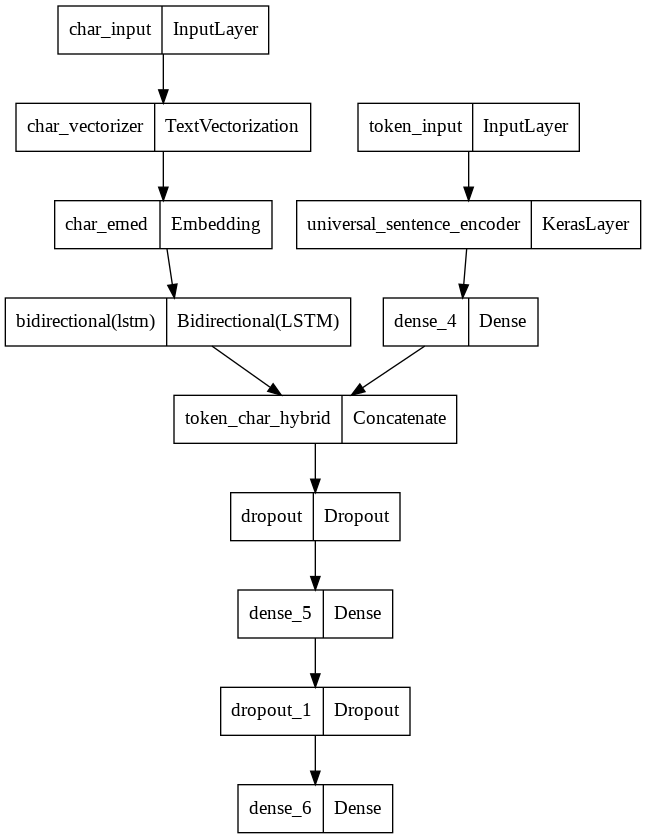

In [79]:
# Plot the hybrid model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

Something to try later could be to switch out the Adam() optimizer with using a stochastic gradient descent (SGD) optimizer like the paper does. 

In [80]:
# Compile the hybrid model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

* Again we will use 10% data for speed
* **important** because we are using both char and tokens, we need to create a dataset that has both. We will do this using a tuple.
 * `((token_data, char_data), (label))` 

### Combining token and character data into a `tf.data` dataset

In [81]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make the data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make the labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # merge to create dataset

# Prefetch and batch the training data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps as above for validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars)) # make the data
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot) # make the labels
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels)) # merge to create dataset
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [82]:
# Check out out dataset info
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting a model on the hybrid sequences


In [83]:
# Fit the model
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 40s 56ms/step - loss: 0.9693 - accuracy: 0.6124 - val_loss: 0.7809 - val_accuracy: 0.6998
Epoch 2/3
562/562 [==============================] - 30s 54ms/step - loss: 0.7911 - accuracy: 0.6971 - val_loss: 0.7156 - val_accuracy: 0.7350
Epoch 3/3
562/562 [==============================] - 28s 51ms/step - loss: 0.7676 - accuracy: 0.7075 - val_loss: 0.6875 - val_accuracy: 0.7397


In [84]:
# Evaluate the model on teh whole val dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 28s 29ms/step - loss: 0.6937 - accuracy: 0.7355


[0.6936973929405212, 0.7354693412780762]

In [85]:
# Make predictions
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[3.6184430e-01, 4.3533868e-01, 5.3107934e-03, 1.8790248e-01,
        9.6037146e-03],
       [3.1243765e-01, 5.3952456e-01, 3.5503351e-03, 1.4281209e-01,
        1.6752948e-03],
       [2.9017952e-01, 1.8871163e-01, 4.3598391e-02, 4.3799457e-01,
        3.9515879e-02],
       ...,
       [4.2138272e-04, 4.8760474e-03, 4.3467797e-02, 1.0876628e-04,
        9.5112598e-01],
       [3.6069572e-03, 3.9192475e-02, 1.8167804e-01, 1.5632787e-03,
        7.7395922e-01],
       [2.9021576e-01, 3.0189654e-01, 2.9541212e-01, 3.1961463e-02,
        8.0514111e-02]], dtype=float32)

In [86]:
# Convert pred probs to classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [89]:
# Get results
model_4_results = model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.54693499271812,
 'f1': 0.7330017282264673,
 'precision': 0.7357334102311344,
 'recall': 0.7354693499271813}

## Model_5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

We can observe that combining token embeddings and character embeddings gave some performance boost (from ~71% for token, and ~66% char accuracy to ~74% accuracy for hybrid).

**BUT!**

There is one more piece to the puzzle that we can add, namely, *engineering our own features!*. This means that we can take our own knowledge about the data and encode it in a way that the model will understand. This is known as **FEATURE ENGINEERING**.

In our specific application the abstracts are often organized in specific ways. Papers generally don't have the conclusion 1st, or go from conclusion to data back to conclusion. An example, logical, order of labels would be 
 * `OBJECTIVE`
 * `METHODS`
 * `METHODS`
 * `METHODS`
 * `RESULTS`
 * `CONCLUSIONS`

Our feature engineering will use the number of total rows in an abstract as well as the current row number of the abstract as captures in the `preprocess_text_with_line_numbers` function that we created at the start of this module.  

In [90]:
# Review training dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


The `line_number` and `total_lines` columns were not clearly contained within the training data, but can be passed to our model as a **positional embedding**. 

### Create positional embeddings

While our line_number and total_lines features are already numerical we could pass directly into the model *however* we want to avoid the model thinking that a line with line_numer=5 is five times creater than a line with `line_number`. Therefore we will use one-hot encoding.

In [91]:
# How many different lines are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

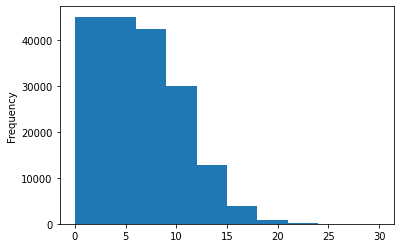

In [92]:
# Uhh let's visualize it
train_df.line_number.plot.hist()

Looks like large majority of abstracts are under 15 lines. We will semi-arbitrarily use this as the cutoff

In [93]:
# Use TF to create one-hot-encoded tensors of our line_number column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)

In [94]:
# Some examples
train_line_numbers_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

Repeat with "total_lines"

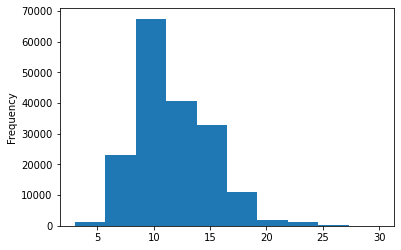

In [95]:
# visualize histogram of total_lines
train_df.total_lines.plot.hist()

In [96]:
# check 98th percentile
np.percentile(train_df.total_lines, 98)

20.0

In [97]:
# One-hot 'total_lines'
train_line_numbers_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
test_line_numbers_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_line_numbers_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)

### Buiding a tri-brid embedding model

We will now create our biggest model yet using the following steps:

1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Create a `"line_number"` model (takes in one-hot-encoded `"line_number"` tensor and passes it through a non-linear layer)
4. Create a `"total_lines"` model (takes in one-hot-encoded `"total_lines"` tensor and passes it through a non-linear layer)
5. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding 
7. Create an output layer to accept the tribrid embedding and output predicted label probabilities
8. Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)


In [98]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, 
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                                 outputs=output_layer)

In [99]:
# Visualize the layers - text
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']     

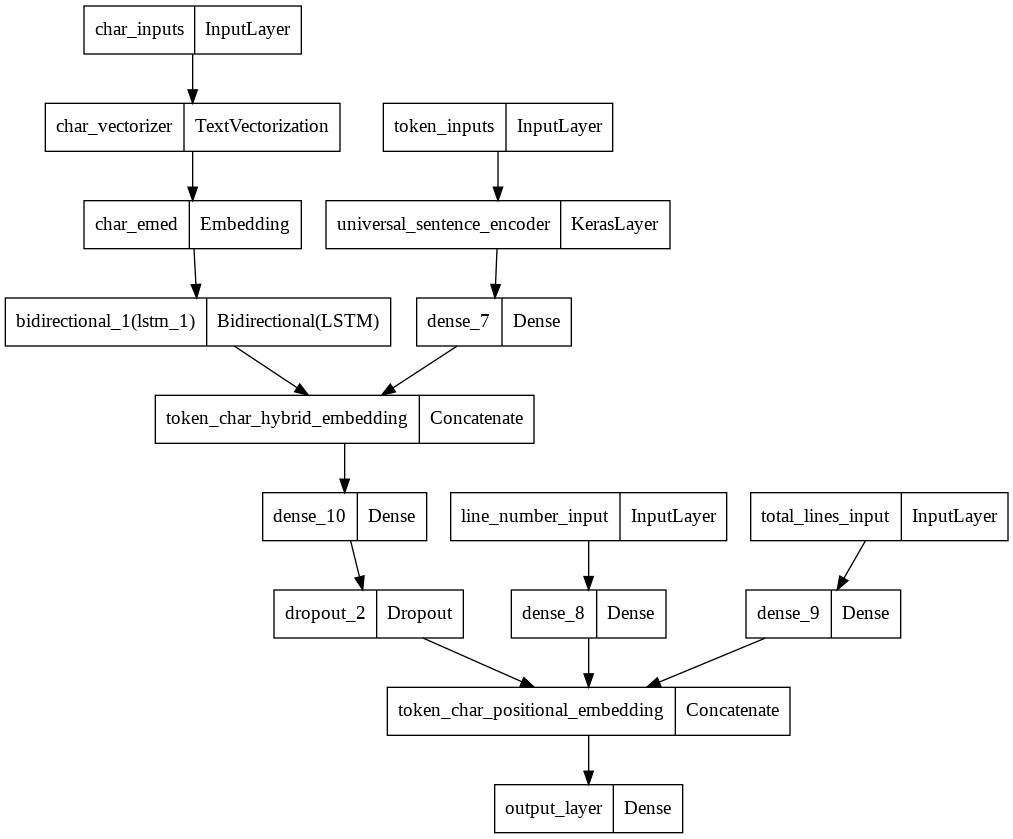

In [100]:
# plot visualization
from tensorflow.keras.utils import plot_model
plot_model(model_5)

This model is looking very similar to the model shown in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf). However, a few differences still remain:
* We're using pretrained TensorFlow Hub token embeddings instead of GloVe emebddings.
* We're using a Dense layer on top of our token-character hybrid embeddings instead of a bi-LSTM layer.
* Section 3.1.3 of the paper mentions a label sequence optimization layer (which helps to make sure sequence labels come out in a respectable order) but it isn't shown in Figure 1. To makeup for the lack of this layer in our model, we've created the positional embeddings layers.
* Section 4.2 of the paper mentions the token and character embeddings are updated during training, our pretrained TensorFlow Hub embeddings remain frozen.
* The paper uses the [`SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) optimizer, we're going to stick with [`Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

All of the differences above are potential extensions of this project.

In [101]:
# Check trainable layers
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f517c2049d0> True
<keras.engine.input_layer.InputLayer object at 0x7f519946fed0> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f50992d6150> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f5188b52090> False
<keras.layers.embeddings.Embedding object at 0x7f50992a4090> True
<keras.layers.core.dense.Dense object at 0x7f509932d950> True
<keras.layers.wrappers.Bidirectional object at 0x7f51993ef410> True
<keras.layers.merge.Concatenate object at 0x7f5199242fd0> True
<keras.engine.input_layer.InputLayer object at 0x7f51993d3650> True
<keras.engine.input_layer.InputLayer object at 0x7f51993c5a50> True
<keras.layers.core.dense.Dense object at 0x7f51994e4450> True
<keras.layers.core.dense.Dense object at 0x7f519935e310> True
<keras.layers.core.dense.Dense object at 0x7f517dd80c10> True
<keras.layers.core.dropout.Dropout object at 0x7f51992bbcd0> True
<keras.layers.merge.Concatenate object at 0x7f5099

Finally, we are going to add **Label Smoothing** to our model. This helps to regularize (and prevent overfitting) of our model.

e.g. instead of:
* `[0.0, 0.0, 1.0, 0.0, 0.0]` for a sample (the model is very confident the right label is index 2).

It's predictions will get smoothed to be something like:
* `[0.01, 0.01, 0.096, 0.01, 0.01]` giving a small activation to each of the other labels, in turn, hopefully improving generalization.

In [102]:
# Compile the model (token, char, and positional embedding)
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Create the tri-brid embedding datasets and fit the model
We will keep our experiments fast, so we will limit our training data to 20,000 abstracts.

Our model this time requires **four inputs**:
1. Train line numbers on-hot tensor (`train_line_numbers_one_hot`)
2. Train total lines one-hot tensor (`train_total_lines_one_hot`)
3. Token-level sequences tensor (`train_sentences`)
4. Char-level sequences tensor (`train_chars`)

These inputs can be passed as tuples to our `tf.data.Dataset.from_tensor_slices` method to create properly shaped `PrefetchedDatasets`.

In [103]:
# Create trawining and validation datasets
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

NameError: ignored

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

In [ ]:
# Make predictions with token-char-positional hybrid model
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

In [ ]:
# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

In [ ]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

## Compare model results!

Now we can see how we might want to proceed with further experiments. Where are we performing best? why do we think that is?

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

In [ ]:
# Adjust accuracy scale 
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [ ]:
# Plot and compare all models
all_model_results.plot(kind="bar").legend(bbox_to_anchor=(1.0,1.0))

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

From the above F1-scores we can see that our tribrid embedding model performs the best by a significant margin. 

We are still underperforming compared to the paper that we were modeling after. In the paper they achieve an F1-score of 90.0 and we get a score of only ~83.

Some things to note
* We trained for 3 epochs only -- we did not investigate how many more we can train to before overfitting
* We only trained on 10% of the dataset
* We evaluated against the validation set, not the test set.

## Saving and loading the best performing model

In [104]:
# Save best performing model to SavedModel format (default)
model_5.save("skimlit_tribrid_model") # model will be saved to path specified by string

INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


In [105]:
# Download pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit_gs_model
!unzip skimlit_tribrid_model.zip -d skimlit_gs_model

--2022-07-29 00:53:39--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.251.33.208, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962561955 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 917.97M   126MB/s    in 11s     

2022-07-29 00:53:50 (86.3 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962561955/962561955]

Archive:  skimlit_tribrid_model.zip
   creating: skimlit_gs_model/skimlit_tribrid_model/
   creating: skimlit_gs_model/skimlit_tribrid_model/variables/
  inflating: skimlit_gs_model/skimlit_tribrid_model/variables/variables.index  
  inflating: skimlit_gs_model/skimlit_tribrid_model/variables/variables.data-00000-of-00001  
  inflating: skimlit_gs_model/skimlit_tribrid_model/keras_met

In [107]:
# Import TensorFlow model dependencies (if needed) - https://github.com/tensorflow/tensorflow/issues/38250 
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "skimlit_gs_model/skimlit_tribrid_model"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path) #,
                                          # Note: with TensorFlow 2.5+ if your SavedModel has a keras_metadata.pb file 
                                          # (created when using model.save()), you shouldn't need the custom_objects
                                          # parameter. I'm leaving the code below here in case you do.
                                          # custom_objects={"TextVectorization": TextVectorization, # required for char vectorization
                                          #                 "KerasLayer": hub.KerasLayer}) # required for token embedding

AssertionError: ignored